In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Large Cars Dataset.csv')

In [5]:
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [6]:
# data cleaning before eda of the numerical data
df['MSRP'] = df['MSRP'].str.replace('$','',regex=False).str.strip()

In [7]:
df['MSRP'] = df['MSRP'].str.replace(',','',regex=False).astype(int)

In [8]:
df['DealerCost'] = df['DealerCost'].str.replace('$','',regex=False).str.strip()

In [9]:
df['DealerCost'] = df['DealerCost'].str.replace(',','',regex=False).astype(int)

In [10]:
df.sample(10)

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
103,Chrysler,Crossfire 2dr,Sports,USA,Rear,34495,32033,3.2,6.0,215,17,25,3060,95,160
72,Chevrolet,Impala 4dr,Sedan,USA,Front,21900,20095,3.4,6.0,180,21,32,3465,111,200
57,Cadillac,CTS VVT 4dr,Sedan,USA,Rear,30835,28575,3.6,6.0,255,18,25,3694,113,190
343,Saab,9-5 Aero,Wagon,Europe,Front,40845,38376,2.3,4.0,250,19,29,3620,106,190
293,Mitsubishi,Diamante LS 4dr,Sedan,Asia,Front,29282,27250,3.5,6.0,205,18,25,3549,107,194
277,Mercury,Mountaineer,SUV,USA,Front,29995,27317,4.0,6.0,210,16,21,4374,114,190
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,44240,40075,3.0,6.0,220,18,25,4013,105,180
175,Hyundai,Sonata LX 4dr,Sedan,Asia,Front,20339,18380,2.7,6.0,170,19,27,3217,106,187
224,Lexus,GS 300 4dr,Sedan,Asia,Rear,41010,36196,3.0,6.0,220,18,25,3649,110,189
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,49690,44936,4.2,8.0,300,17,24,4024,109,193


Brand
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Subaru           11
Kia              11
Pontiac          11
Mazda            11
Lexus            11
Buick             9
Mercury           9
Lincoln           9
Cadillac          8
GMC               8
Saturn            8
Suzuki            8
Infiniti          8
Acura             7
Saab              7
Porsche           7
Land Rover        3
Oldsmobile        3
Jeep              3
Isuzu             2
MINI              2
Scion             2
Hummer            1
Name: count, dtype: int64


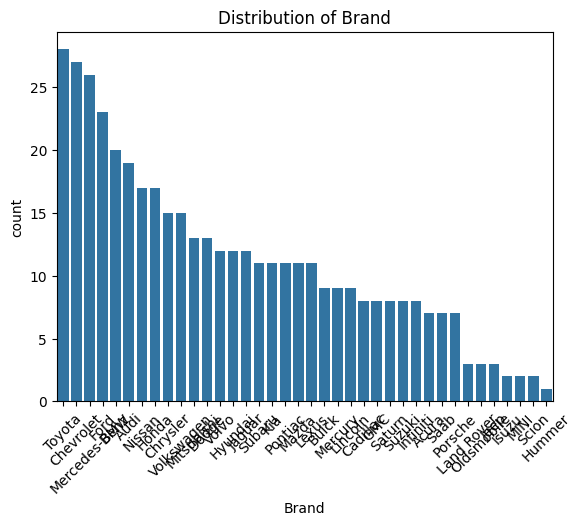

VehicleClass
Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64


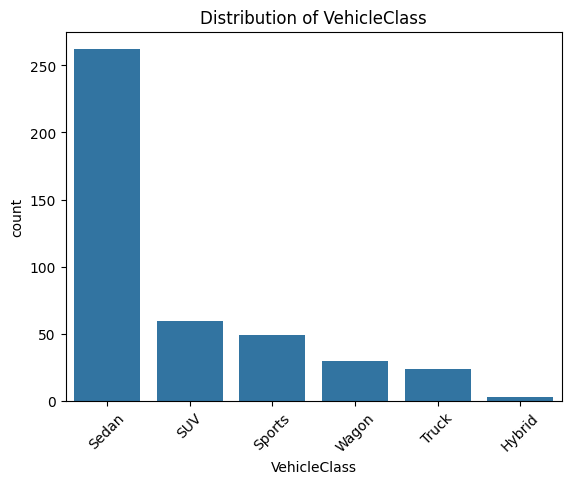

Region
Asia      158
USA       147
Europe    123
Name: count, dtype: int64


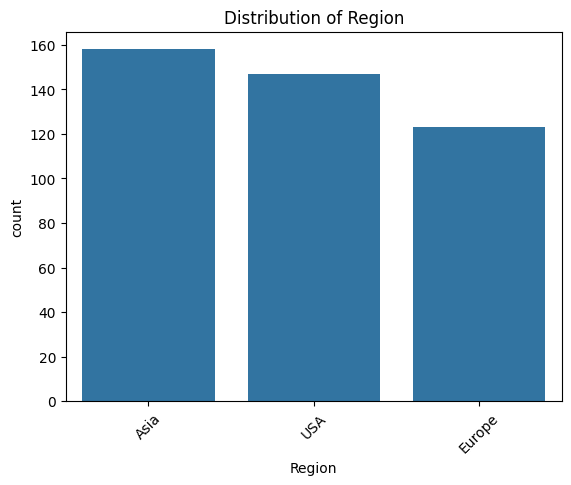

DriveTrain
Front    226
Rear     110
All       92
Name: count, dtype: int64


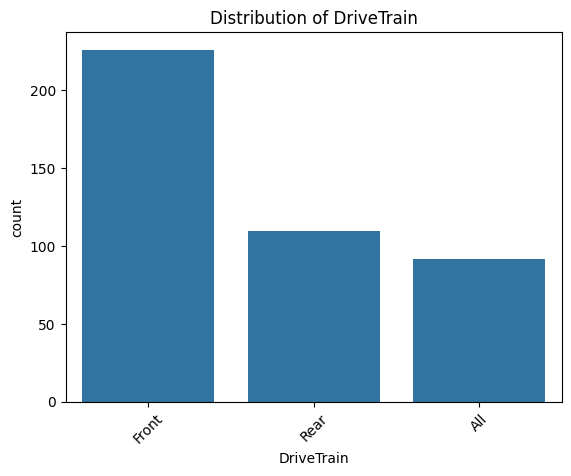

In [11]:
# univariate analysis
cols = ['Brand','VehicleClass','Region','DriveTrain']

for col in cols:
    print(df[col].value_counts())
    sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

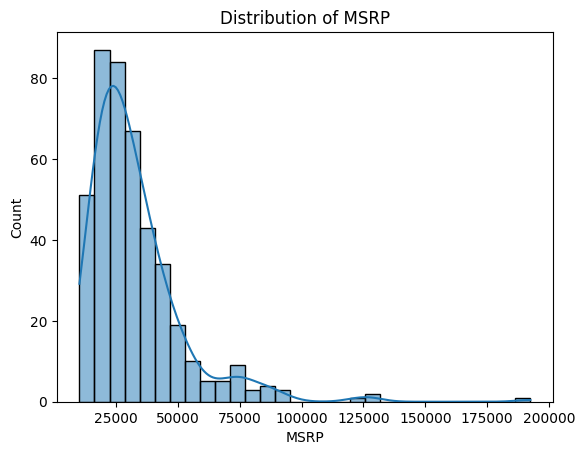

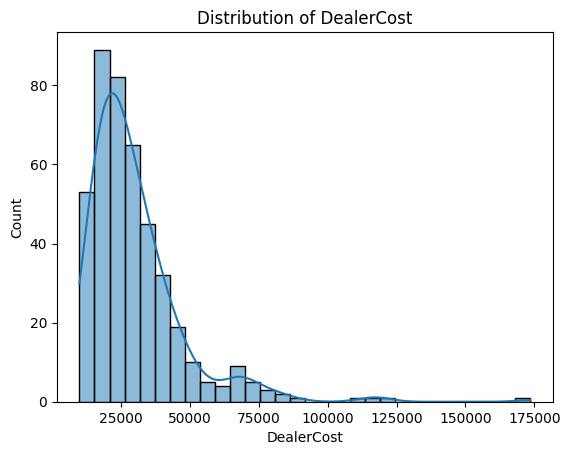

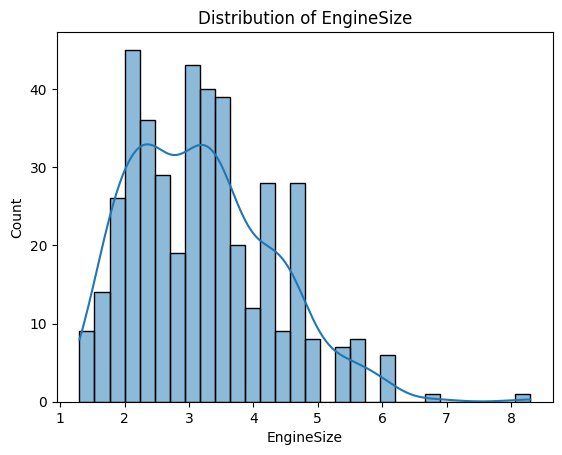

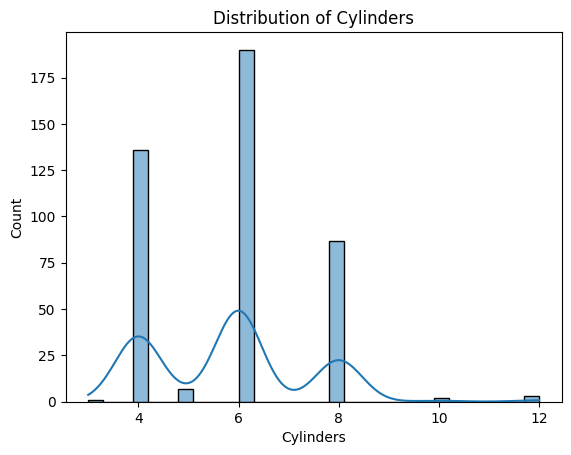

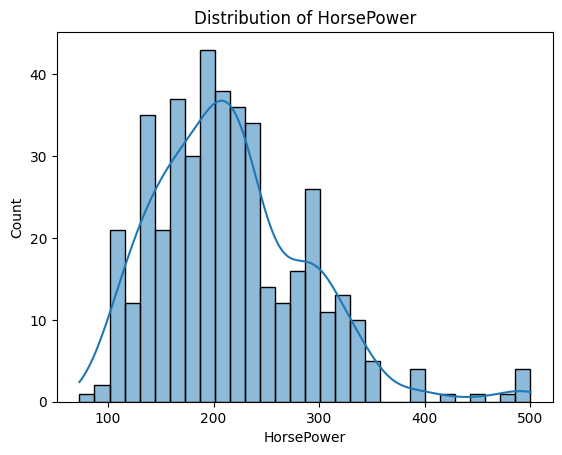

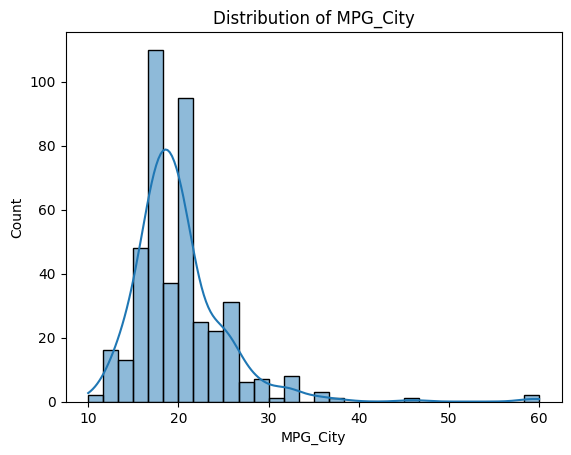

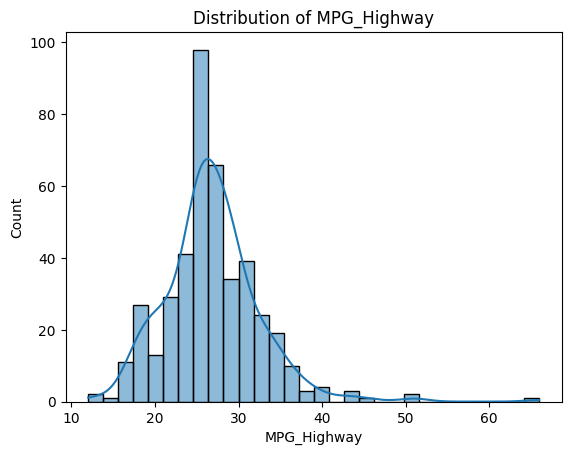

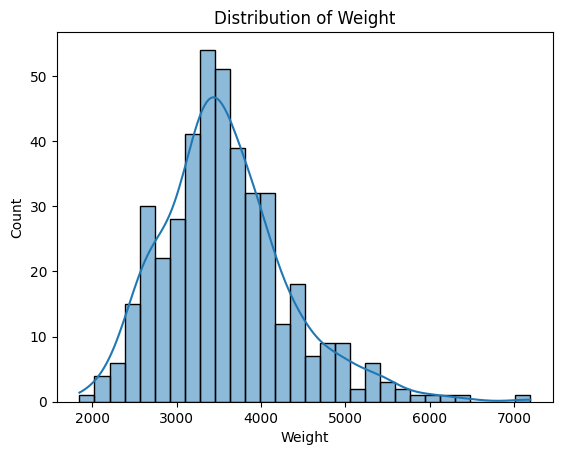

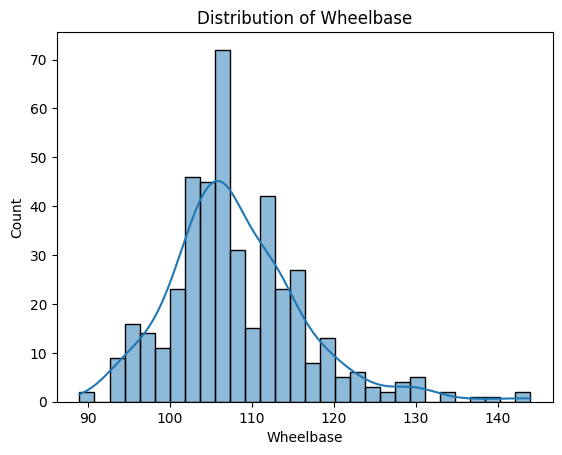

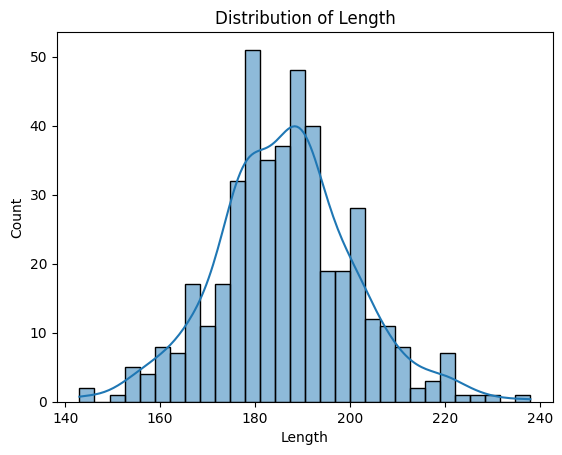

In [12]:
numerical_columns = ['MSRP', 'DealerCost', 'EngineSize', 'Cylinders', 'HorsePower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']

for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


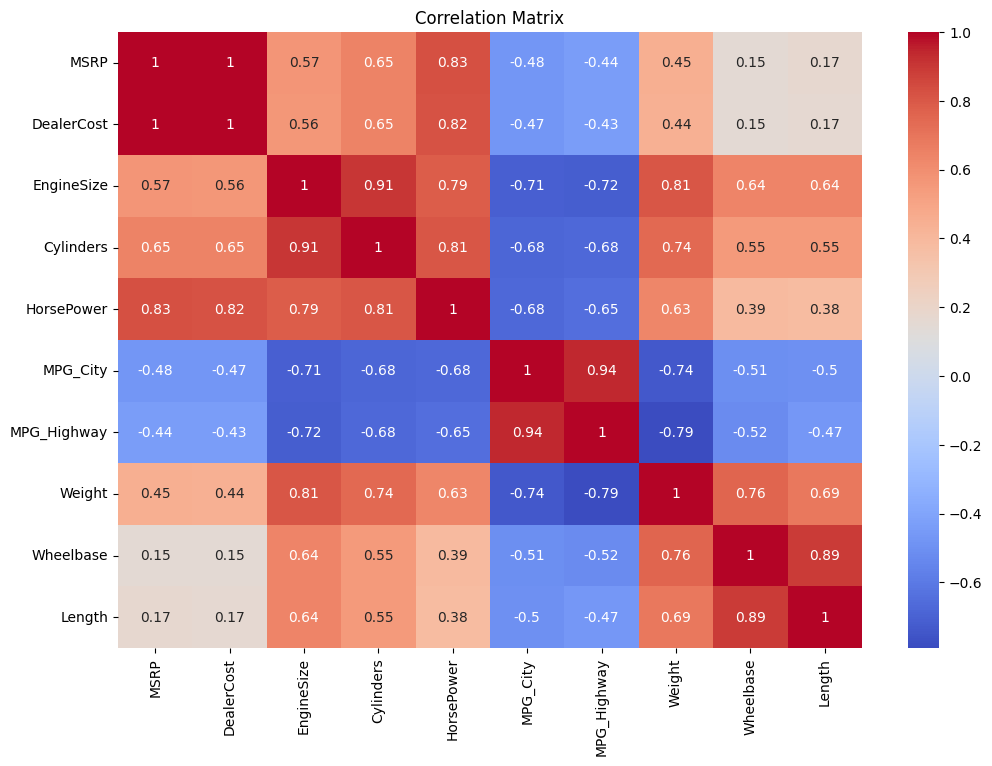

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


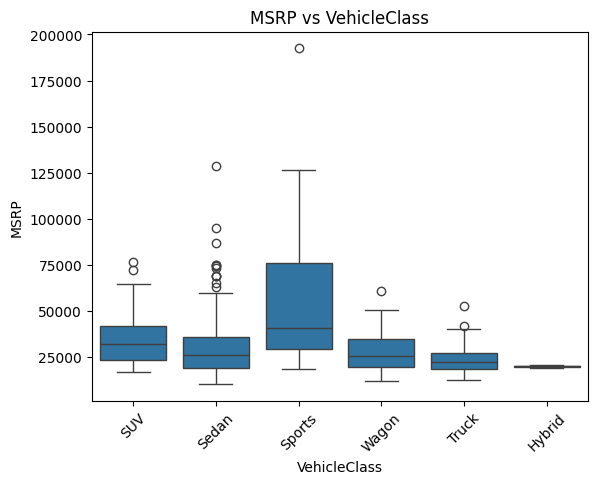

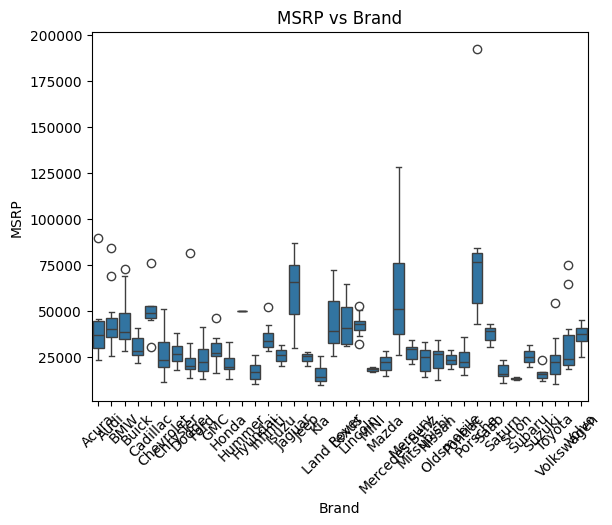

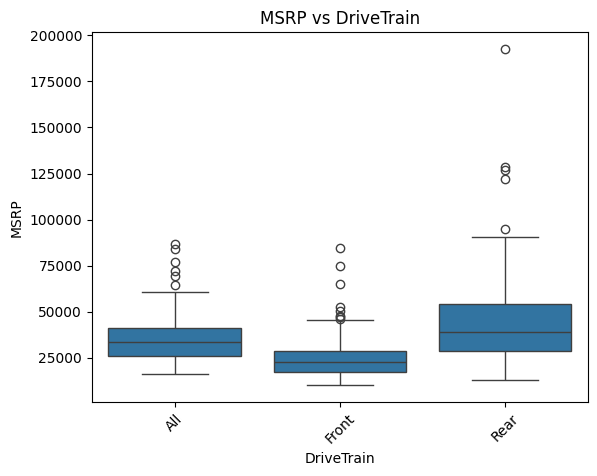

In [14]:
for col in ['VehicleClass', 'Brand', 'DriveTrain']:
    sns.boxplot(data=df, x=col, y='MSRP')
    plt.xticks(rotation=45)
    plt.title(f'MSRP vs {col}')
    plt.show()


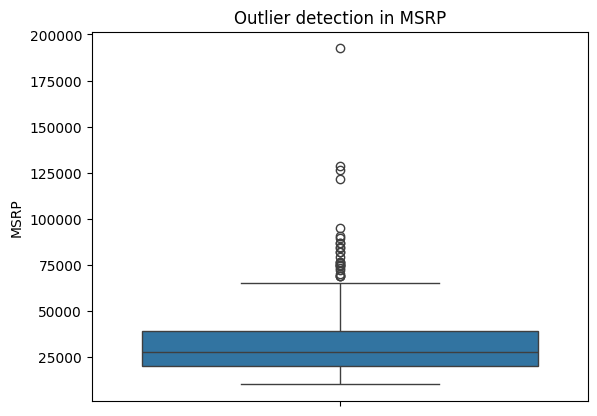

In [15]:
# Example: Outliers in MSRP
sns.boxplot(data=df, y='MSRP')
plt.title("Outlier detection in MSRP")
plt.show()


In [16]:
# feature engineering
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [17]:
# adding a new column for avg of mile per gallon 
df['MPG_Avg'] = (df['MPG_City'] + df['MPG_Highway']) / 2

In [18]:
print(df[['MPG_Avg','MPG_City','MPG_Highway']].head())

   MPG_Avg  MPG_City  MPG_Highway
0     20.0        17           23
1     27.5        24           31
2     25.5        22           29
3     24.0        20           28
4     21.0        18           24


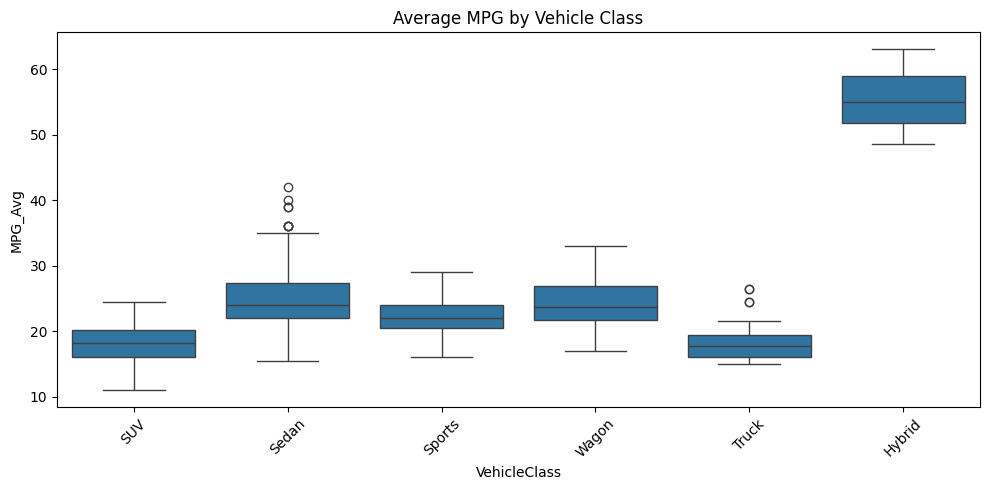

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot of average MPG by VehicleClass
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='VehicleClass', y='MPG_Avg')
plt.xticks(rotation=45)
plt.title('Average MPG by Vehicle Class')
plt.tight_layout()
plt.show()


In [20]:
df.drop(columns=['MPG_City','MPG_Highway'],axis=1,inplace=True)

In [21]:
df.head()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,Weight,Wheelbase,Length,MPG_Avg
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,4451,106,189,20.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,2778,101,172,27.5
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,3230,105,183,25.5
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,3575,108,186,24.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,3880,115,197,21.0


In [22]:
df.sample()

,Brand,Model,VehicleClass,Region,DriveTrain,MSRP,DealerCost,EngineSize,Cylinders,HorsePower,Weight,Wheelbase,Length,MPG_Avg
340,Saab,9-5 Aero 4dr,Sedan,Europe,Front,39465,37721,2.3,4.0,250,3470,106,190,25.0


In [23]:
# imputing 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# impute_col = ['Cylinders']

# trf1 = ColumnTransformer([
#     ('impute_cy',SimpleImputer(strategy='mean'),impute_col)
# ],remainder='passthrough')

In [24]:
# encoding

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

impute_col = ['Cylinders']
ordinal_col = ['VehicleClass']
ordinal_order = [['Sedan','SUV','Hybrid','Sports','Wagon','Truck']]
onehot_cols = ['Brand', 'Model', 'Region', 'DriveTrain']

trf1 = ColumnTransformer([
    ('impute_cy',SimpleImputer(strategy='mean'),impute_col),
    ('Veh_cla_oe',OrdinalEncoder(categories=ordinal_order),ordinal_col),
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),onehot_cols)
],remainder='passthrough')

In [25]:
# train test split 
from sklearn.model_selection import train_test_split

x = df.drop(columns=['MSRP'],axis=1)
y = df['MSRP']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# creating pipeline

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,random_state=42)

In [27]:
from sklearn.pipeline import Pipeline

preprocess_pipe = Pipeline([
    ('preprocess',trf1),
    ('model',model)
])

In [28]:
preprocess_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_cy', SimpleImputer(),
                                                  ['Cylinders']),
                                                 ('Veh_cla_oe',
                                                  OrdinalEncoder(categories=[['Sedan',
                                                                              'SUV',
                                                                              'Hybrid',
                                                                              'Sports',
                                                                              'Wagon',
                                                                              'Truck']]),
                                                  ['VehicleClass']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Brand', 'Model', 'Region',
                                                   'DriveTrain'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [29]:
y_pred = preprocess_pipe.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

# print('r2 score:',r2_score(y_test,y_pred))

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(preprocess_pipe,x,y,cv=5,scoring='r2')
print("mean:",np.mean(scores))

mean: 0.9396491047245835


In [32]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
pipe_ridge = Pipeline([
    ('preprocess', trf1),
    ('model', ridge_model)
])

scores_ridge = cross_val_score(pipe_ridge, x, y, cv=5, scoring='r2')
print("Ridge Cross-Validated R²:", scores_ridge.mean())


Ridge Cross-Validated R²: 0.9977884189660446


In [33]:
pipe_ridge.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_cy', SimpleImputer(),
                                                  ['Cylinders']),
                                                 ('Veh_cla_oe',
                                                  OrdinalEncoder(categories=[['Sedan',
                                                                              'SUV',
                                                                              'Hybrid',
                                                                              'Sports',
                                                                              'Wagon',
                                                                              'Truck']]),
                                                  ['VehicleClass']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Brand', 'Model', 'Region',
                                                   'DriveTrain'])])),
                ('model', Ridge())])

In [34]:
y_pred2 = pipe_ridge.predict(x_test)

In [35]:
print('r2_score:',r2_score(y_test,y_pred2))

r2_score: 0.9995297998822293


In [36]:
scores_ridge = cross_val_score(pipe_ridge, x, y, cv=5, scoring='r2')
print("Ridge Cross-Validated R²:", scores_ridge.mean())

Ridge Cross-Validated R²: 0.9977884189660446


In [37]:
import joblib

joblib.dump(pipe_ridge,'ridge_pipeline.joblib')

['ridge_pipeline.joblib']

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha' : np.logspace(-3, 3, 10)
}

grid_search = GridSearchCV(estimator=pipe_ridge,param_grid=param_grid,scoring='r2',cv=5,n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_cy',
                                                                         SimpleImputer(),
                                                                         ['Cylinders']),
                                                                        ('Veh_cla_oe',
                                                                         OrdinalEncoder(categories=[['Sedan',
                                                                                                     'SUV',
                                                                                                     'Hybrid',
                                                                                                     'Sports',
                                                                                                     'Wagon',
                                                                                                     'Truck']]),
                                                                         ['VehicleClass']),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Brand',
                                                                          'Model',
                                                                          'Region',
                                                                          'DriveTrain'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='r2', verbose=1)

In [43]:
print("Best Alpha: ",grid_search.best_params_['model__alpha'])
print("Best CV r2 score: ",grid_search.best_score_)

Best Alpha:  0.1
Best CV r2 score:  0.9992215027666163


In [44]:
from sklearn.linear_model import Ridge

final_ridge = Ridge(alpha=0.1)

In [48]:
final_pipe_ridge = Pipeline([
    ('preprocess',trf1),
    ('model',final_ridge)
])

In [49]:
final_pipe_ridge.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_cy', SimpleImputer(),
                                                  ['Cylinders']),
                                                 ('Veh_cla_oe',
                                                  OrdinalEncoder(categories=[['Sedan',
                                                                              'SUV',
                                                                              'Hybrid',
                                                                              'Sports',
                                                                              'Wagon',
                                                                              'Truck']]),
                                                  ['VehicleClass']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Brand', 'Model', 'Region',
                                                   'DriveTrain'])])),
                ('model', Ridge(alpha=0.1))])

In [51]:
import joblib

joblib.dump(final_pipe_ridge,'final_ridge_pipeline.joblib')

['final_ridge_pipeline.joblib']

In [53]:
joblib.dump(df,'data.joblib')

['data.joblib']